In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne import Epochs, find_events, create_info
from mne.io import concatenate_raws, read_raw_edf

In [2]:
raw = mne.io.read_raw_edf('/data1/ecog_project/edf/aa9da7b2/aa9da7b2_5.edf')
#raw.load_data()

Extracting edf Parameters from /data1/ecog_project/edf/aa9da7b2/aa9da7b2_5.edf...
EDF file detected
Setting channel info structure...
Created Raw.info structure...
Ready.


In [ ]:
raw.info

In [ ]:
#raw.plot(scalings='auto', lowpass=raw.info['lowpass']-0.00000001)
raw.plot(scalings='auto',duration=80000, title='Patient aa9da7b2',remove_dc=True,n_channels=10,bad_color='red',lowpass=raw.info['lowpass']-0.00000001)

In [3]:
#get data from picks=channel=1 (AMGY1)
channel=raw.get_data(picks=[2,3,6,40,10,15,18,20],start=0,reject_by_annotation=None, return_times=True)
#t_f=mne.time_frequency.stft(channel[0][2],80)#, tstep=128)
#t_f_abs=np.abs(t_f)
#t_f_abs=np.squeeze(t_f_abs)
#print(t_f_abs)

In [ ]:
#plt.figure(figsize=(20,10))
plt.imshow(np.log(t_f_abs),cmap='viridis',aspect='auto')
plt.xlabel('Time window Index of STFT')
plt.ylabel('Frequency')
plt.gca().invert_yaxis()
cb=plt.colorbar()
cb.set_label('Intensity of Frequency per time window')


In [ ]:
plt.specgram(np.squeeze(channel[0][0]),Fs=1000)
plt.xlabel('Time window Index of STFT')
plt.ylabel('Frequency')
cb=plt.colorbar()
cb.set_label('Intensity of Frequency per time window')

Text(0,0.5,'Activity (V)')

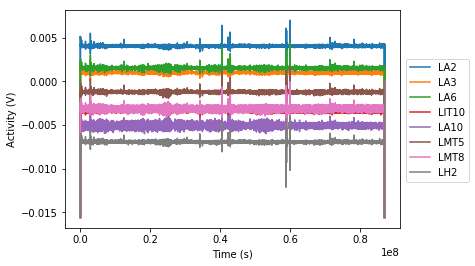

In [4]:
for en,i in enumerate([2,3,6,40,10,15,18,20]):
    ch_n=raw.info['chs'][i]['ch_name']
    plt.plot(np.squeeze(channel[0][en]),label=str(ch_n))
    
plt.legend(loc='upper right', bbox_to_anchor=(1.22, 0.8),
          fancybox=True, ncol=1)
plt.xlabel('Time (s)')
plt.ylabel('Activity (V)')

In [ ]:
len(raw)